In [1]:
# !pip install virtualenv
# !vitualrenv my-venv
# !source my-venv/bin/activate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 22.7 MB/s eta 0:00:00
/bin/bash: line 1: vitualrenv: command not found
/bin/bash: line 1: my-venv/bin/activate: No such file or directory


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

In [5]:
df = pd.read_csv("/content/drive/MyDrive/elevvo/Task 4/synthetic_loan_data.csv")

In [17]:
print('Shape:',df.shape)
print('\nData Types:\n',df.dtypes)
print('\nMissing Values:\n',df.isnull().sum())
print('\nUnique Values in Categorical Columns:\n')
for col in df.select_dtypes(include=['object']).columns:
  print(f'{col}: {df[col].nunique()} unique values')

Shape: (9000, 14)

Data Types:
 CustomerID              object
Name                    object
Age                      int64
Gender                  object
MaritalStatus           object
EducationLevel          object
EmploymentStatus        object
AnnualIncome             int64
LoanAmountRequested      int64
PurposeOfLoan           object
CreditScore              int64
ExistingLoansCount       int64
LatePaymentsLastYear     int64
LoanApproved            object
dtype: object

Missing Values:
 CustomerID              0
Name                    0
Age                     0
Gender                  0
MaritalStatus           0
EducationLevel          0
EmploymentStatus        0
AnnualIncome            0
LoanAmountRequested     0
PurposeOfLoan           0
CreditScore             0
ExistingLoansCount      0
LatePaymentsLastYear    0
LoanApproved            0
dtype: int64

Unique Values in Categorical Columns:

CustomerID: 9000 unique values
Name: 8487 unique values
Gender: 2 unique values
Marit

In [18]:
df.head()

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No


In [19]:
df.drop(['CustomerID','Name'],axis=1)

,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,22,Female,Divorced,Other,Student,178359,48541,Education,363,2,8,Yes
8996,26,Female,Widowed,Other,Self-employed,126938,33411,Education,379,4,7,Yes
8997,19,Male,Married,PhD,Student,119957,47023,Car,693,2,6,Yes
8998,51,Female,Married,PhD,Retired,160226,31385,Personal,649,4,7,No


In [24]:
print('\nAge Analysis:')
print(df['Age'].describe())
print('\nValue Counts: \n',df['Age'].value_counts().head())
print('\nIncome Analysis:')
print(df['AnnualIncome'].describe())
print('\nValue Counts: \n',df['AnnualIncome'].value_counts().head())
print('\nLoanAmount Analysis:')
print(df['LoanAmountRequested'].describe())
print('\nValue Counts: \n',df['LoanAmountRequested'].value_counts().head())


Age Analysis:
count    9000.000000
mean       43.550444
std        14.909264
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64

Value Counts: 
 Age
62    203
64    199
34    198
43    197
66    196
Name: count, dtype: int64

Income Analysis:
count      9000.000000
mean     110279.808556
std       52147.330689
min       20009.000000
25%       65443.250000
50%      110331.000000
75%      155539.250000
max      199988.000000
Name: AnnualIncome, dtype: float64

Value Counts: 
 AnnualIncome
180083    3
197342    3
20785     3
85923     3
142494    3
Name: count, dtype: int64

LoanAmount Analysis:
count     9000.000000
mean     25680.583333
std      14116.494549
min       1000.000000
25%      13564.750000
50%      25814.000000
75%      37941.500000
max      49989.000000
Name: LoanAmountRequested, dtype: float64

Value Counts: 
 LoanAmountRequested
34489    4
25107    4
25491    4
48777    4
28562    3
Name: cou

/tmp/ipython-input-2830218371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,ax=axes[0,1],palette='pastel')
/tmp/ipython-input-2830218371.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MaritalStatus',data=df,ax=axes[0,2],palette='tab10')
/tmp/ipython-input-2830218371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EducationLevel',data=df,ax=axes[0,3],order=edu_order,palette='coolwarm')
/tmp/ipython-input-2830218371.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

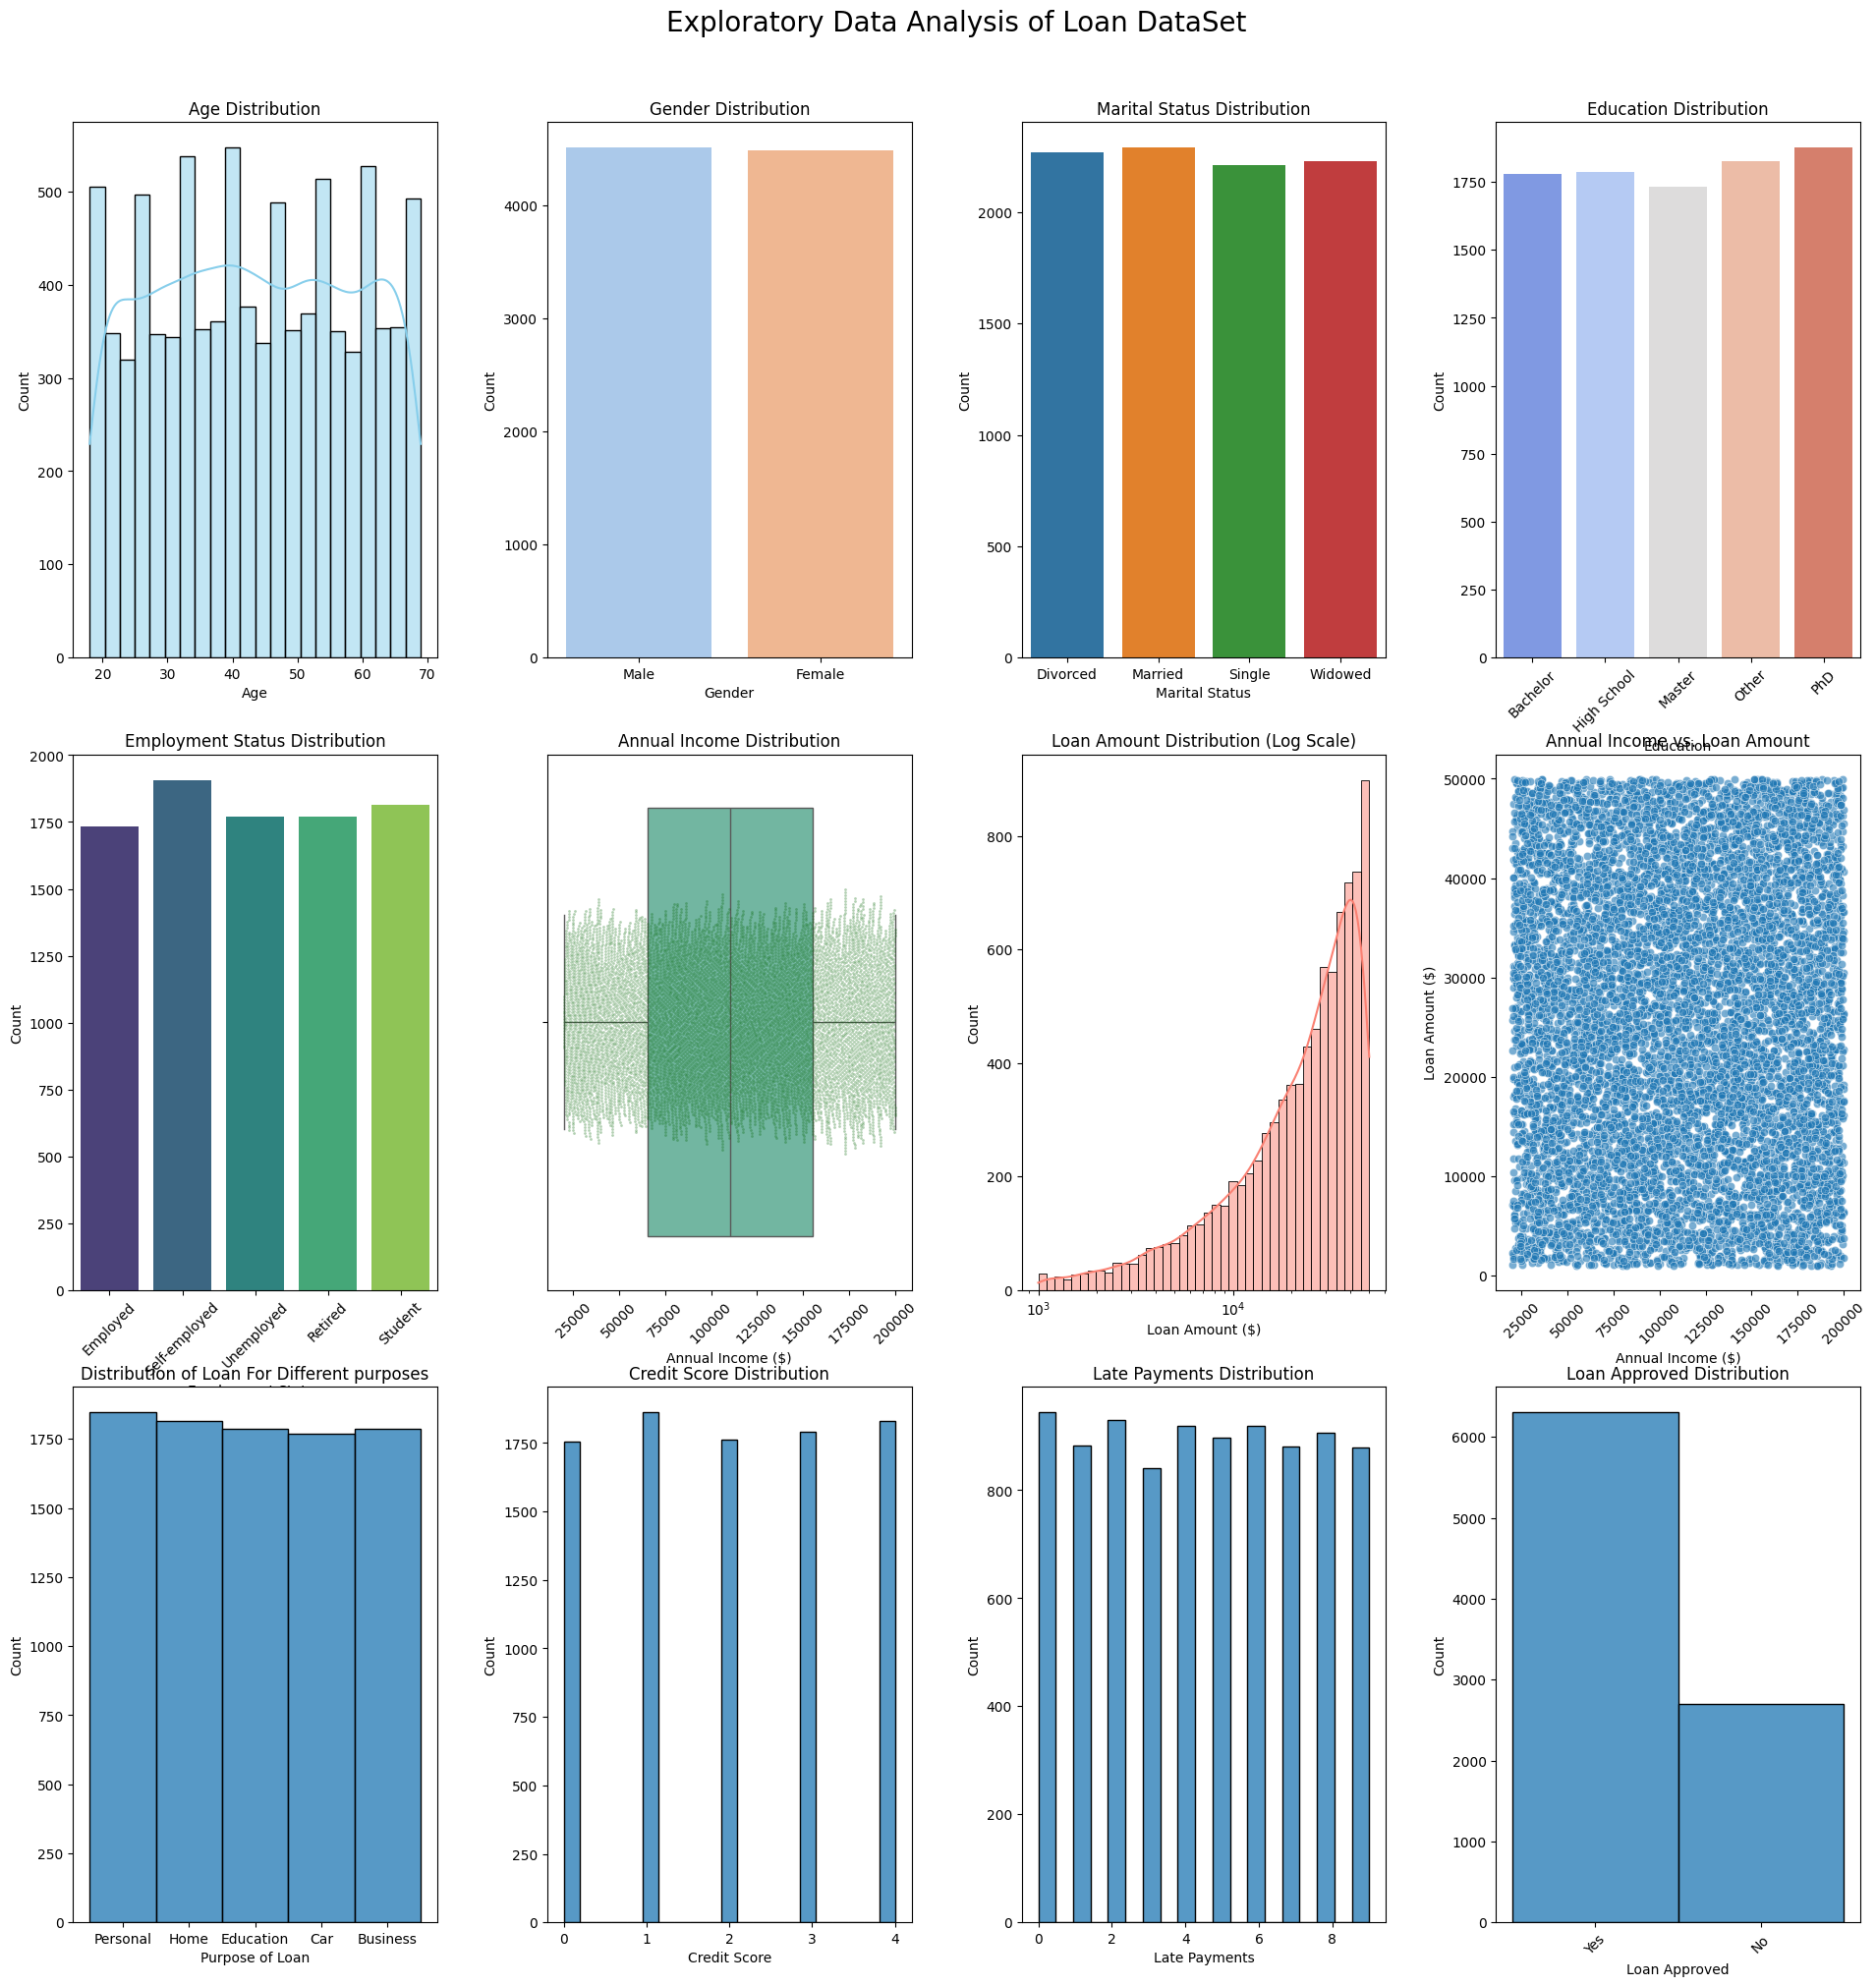

In [42]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.tight_layout(pad=5.0)
sns.histplot(df['Age'],kde=True,ax=axes[0,0],color='skyblue')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')

sns.countplot(x='Gender',data=df,ax=axes[0,1],palette='pastel')
axes[0,1].set_title('Gender Distribution')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')

sns.countplot(x='MaritalStatus',data=df,ax=axes[0,2],palette='tab10')
axes[0,2].set_title('Marital Status Distribution')
axes[0,2].set_xlabel('Marital Status')
axes[0,2].set_ylabel('Count')

edu_order = sorted(df['EducationLevel'].unique())
sns.countplot(x='EducationLevel',data=df,ax=axes[0,3],order=edu_order,palette='coolwarm')
axes[0,3].set_title('Education Distribution')
axes[0,3].set_xlabel('Education')
axes[0,3].set_ylabel('Count')
axes[0,3].tick_params(axis='x', rotation=45)

sns.countplot(x='EmploymentStatus',data=df,ax=axes[1,0],palette='viridis')
axes[1,0].set_title('Employment Status Distribution')
axes[1,0].set_xlabel('Employment Status')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(x=df['AnnualIncome'],ax=axes[1,1],palette='Set2')
sns.swarmplot(x=df['AnnualIncome'],ax=axes[1,1],color='darkgreen',size=2,alpha=0.3)
axes[1,1].set_title('Annual Income Distribution')
axes[1,1].set_xlabel('Annual Income ($)')
axes[1,1].tick_params(axis='x', rotation=45)

sns.histplot(df['LoanAmountRequested'],kde=True,ax=axes[1,2],color='salmon',log_scale=True)
axes[1,2].set_title('Loan Amount Distribution (Log Scale)')
axes[1,2].set_xlabel('Loan Amount ($)')
axes[1,2].set_ylabel('Count')

sns.scatterplot(x='AnnualIncome',y='LoanAmountRequested',data=df,ax=axes[1,3],alpha=0.6)
axes[1,3].set_title('Annual Income vs. Loan Amount')
axes[1,3].set_xlabel('Annual Income ($)')
axes[1,3].set_ylabel('Loan Amount ($)')
axes[1,3].tick_params(axis='x', rotation=45)

sns.histplot(df['PurposeOfLoan'],ax=axes[2,0],palette='pastel')
axes[2,0].set_title('Distribution of Loan For Different purposes')
axes[2,0].set_xlabel('Purpose of Loan')
axes[2,0].set_ylabel('Count')

sns.histplot(df['ExistingLoansCount'],ax=axes[2,1],palette='Spectral')
axes[2,1].set_title('Credit Score Distribution')
axes[2,1].set_xlabel('Credit Score')
axes[2,1].set_ylabel('Count')

sns.histplot(df['LatePaymentsLastYear'],ax=axes[2,2],palette='crest')
axes[2,2].set_title('Late Payments Distribution')
axes[2,2].set_xlabel('Late Payments')
axes[2,2].set_ylabel('Count')

sns.histplot(df['LoanApproved'],ax=axes[2,3],palette='Paired')
axes[2,3].set_title('Loan Approved Distribution')
axes[2,3].set_xlabel('Loan Approved')
axes[2,3].set_ylabel('Count')
axes[2,3].tick_params(axis='x', rotation=45)

plt.suptitle('Exploratory Data Analysis of Loan DataSet',y=1.02, fontsize=20)
plt.show()

In [43]:
# Insert new Customer ID column at position 0 (first column)
df.insert(0, 'Customer ID', range(1, len(df) + 1))

# Verify
print("First 5 Customer IDs:")
print(df['Customer ID'].head())

print("\nLast 5 Customer IDs:")
print(df['Customer ID'].tail())

print("\nTotal unique IDs:", df['Customer ID'].nunique())

First 5 Customer IDs:
0    1
1    2
2    3
3    4
4    5
Name: Customer ID, dtype: int64

Last 5 Customer IDs:
8995    8996
8996    8997
8997    8998
8998    8999
8999    9000
Name: Customer ID, dtype: int64

Total unique IDs: 9000


In [45]:
df.tail()

,Customer ID,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
8995,8996,bdcfc42b-8122-41db-aa6a-58b294568b74,Jose Torres,22,Female,Divorced,Other,Student,178359,48541,Education,363,2,8,Yes
8996,8997,a874d557-cd0e-4708-acbf-81d4b1720b65,Michael Butler,26,Female,Widowed,Other,Self-employed,126938,33411,Education,379,4,7,Yes
8997,8998,8a4f48b2-d251-43ad-880b-dbd7657050ee,Veronica Avila,19,Male,Married,PhD,Student,119957,47023,Car,693,2,6,Yes
8998,8999,8d5af123-085d-47e6-872c-5869d4c933f2,Kayla Miller,51,Female,Married,PhD,Retired,160226,31385,Personal,649,4,7,No
8999,9000,f3151b0a-fd13-4ac5-a6cf-af54ca9dc28c,Jackie Carter,55,Female,Single,Bachelor,Self-employed,77916,7673,Education,510,2,1,Yes


In [46]:
df.drop(['CustomerID','Name'],axis=1)

,Customer ID,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,1,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,2,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,3,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,4,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,5,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8996,22,Female,Divorced,Other,Student,178359,48541,Education,363,2,8,Yes
8996,8997,26,Female,Widowed,Other,Self-employed,126938,33411,Education,379,4,7,Yes
8997,8998,19,Male,Married,PhD,Student,119957,47023,Car,693,2,6,Yes
8998,8999,51,Female,Married,PhD,Retired,160226,31385,Personal,649,4,7,No


In [47]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])